## 7장 2절 

In [2]:
import pandas as pd

# 시각화 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
tips = sns.load_dataset("tips")
tips.shape

(244, 7)

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
tips.total_bill.mean()

19.78594262295082

In [6]:
tips.total_bill.median()

17.795

In [7]:
from scipy import stats
stats.trim_mean(tips.total_bill, 0.1)

18.733214285714286

In [8]:
tips.total_bill.max() - tips.total_bill.min()

47.74

In [9]:
tips.total_bill.std() 

8.902411954856856

In [10]:
tips.total_bill.quantile(0.75) - tips.total_bill.quantile(0.25)

10.779999999999998

In [11]:
tips_tb = tips.describe()
tips_tb.loc['mean', 'total_bill']

19.78594262295082

In [12]:
bill_tb = tips.total_bill.describe()
bill_tb

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [13]:
bill_tb['mean']

19.78594262295082

In [14]:
tips['total_bill'].corr(tips['tip'])

0.6757341092113641

In [15]:
tips['total_bill'].corr(tips['tip'], method = 'spearman')

0.6789681219001009

In [16]:
tips.corr(numeric_only = True)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [17]:
tips.corr(numeric_only = True, method='spearman')

,total_bill,tip,size
total_bill,1.000000,0.678968,0.604791
tip,0.678968,1.000000,0.468268
size,0.604791,0.468268,1.000000


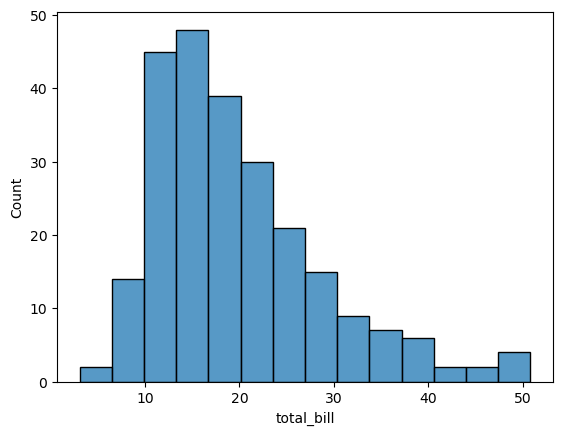

In [18]:
sns.histplot(tips.total_bill)
plt.show()

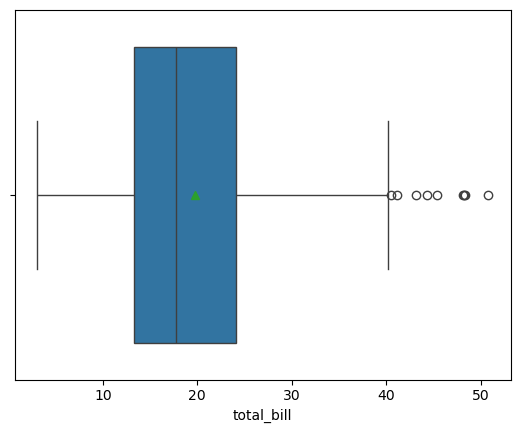

In [19]:
sns.boxplot(data=tips, x='total_bill', showmeans=True)
plt.show()

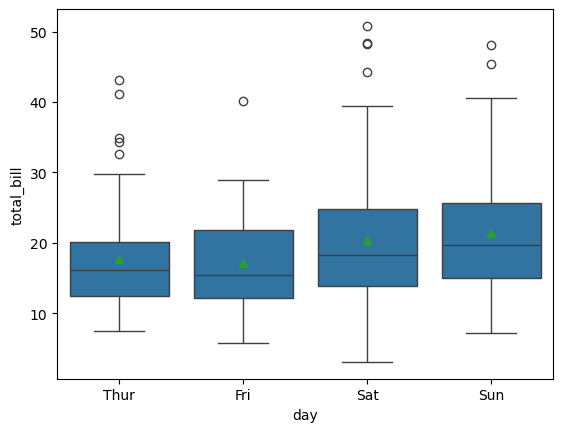

In [20]:
sns.boxplot(data=tips, x='day', y='total_bill', showmeans=True)
plt.show()

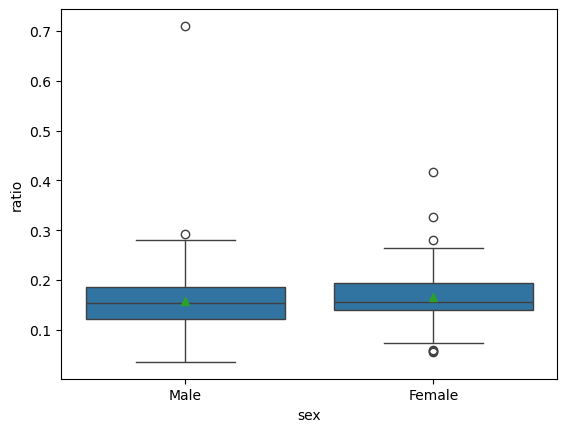

In [21]:
tips['ratio'] = tips.tip / tips.total_bill
sns.boxplot(data=tips, x='sex', y='ratio', showmeans=True)
plt.show()

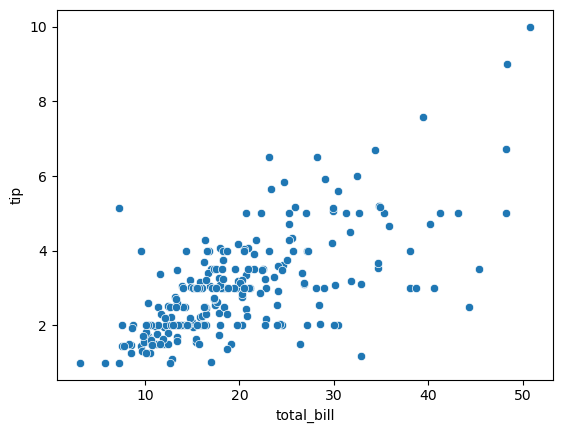

In [22]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

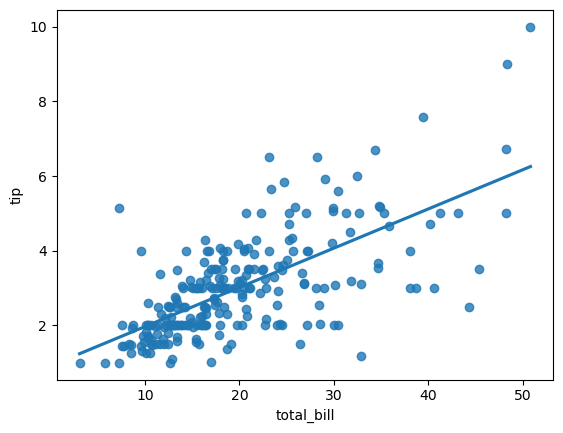

In [23]:
sns.regplot(data=tips, x='total_bill', y='tip', ci=None)
plt.show()

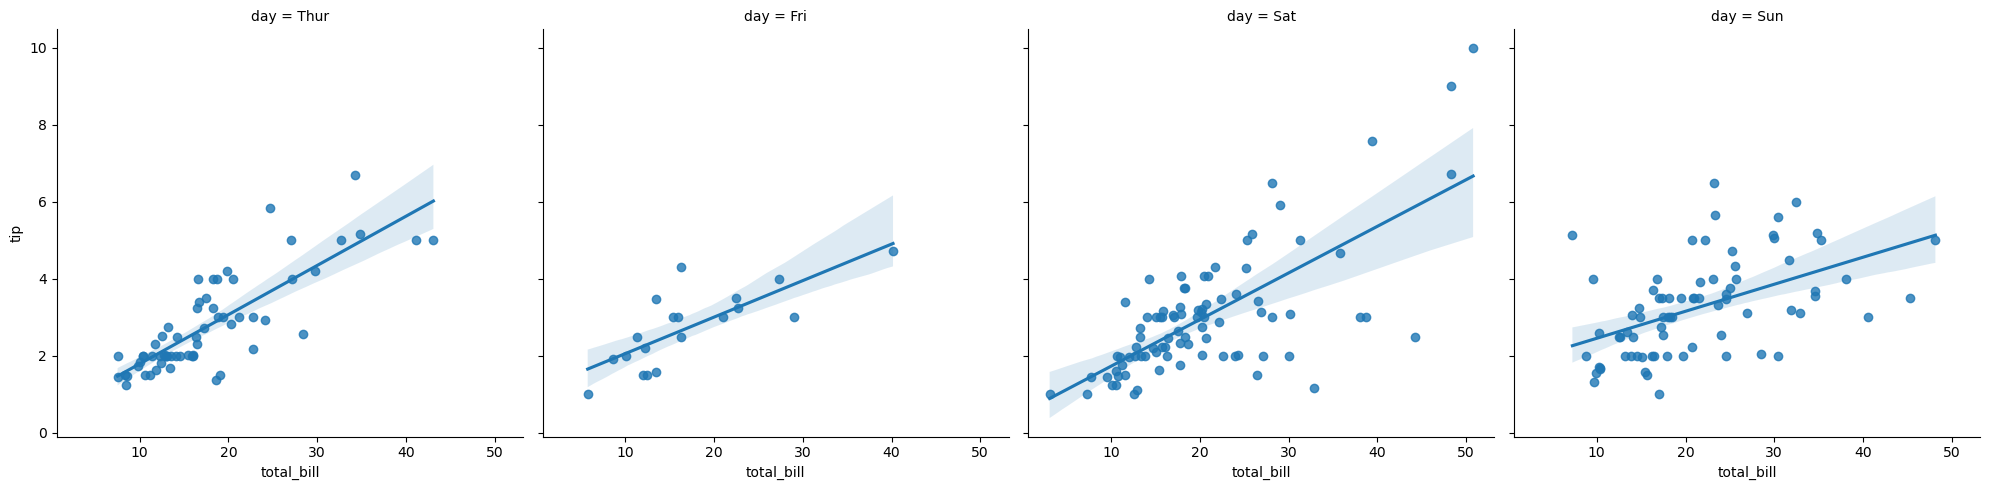

In [24]:
sns.lmplot(data=tips, x='total_bill', y='tip', col="day")
plt.show()

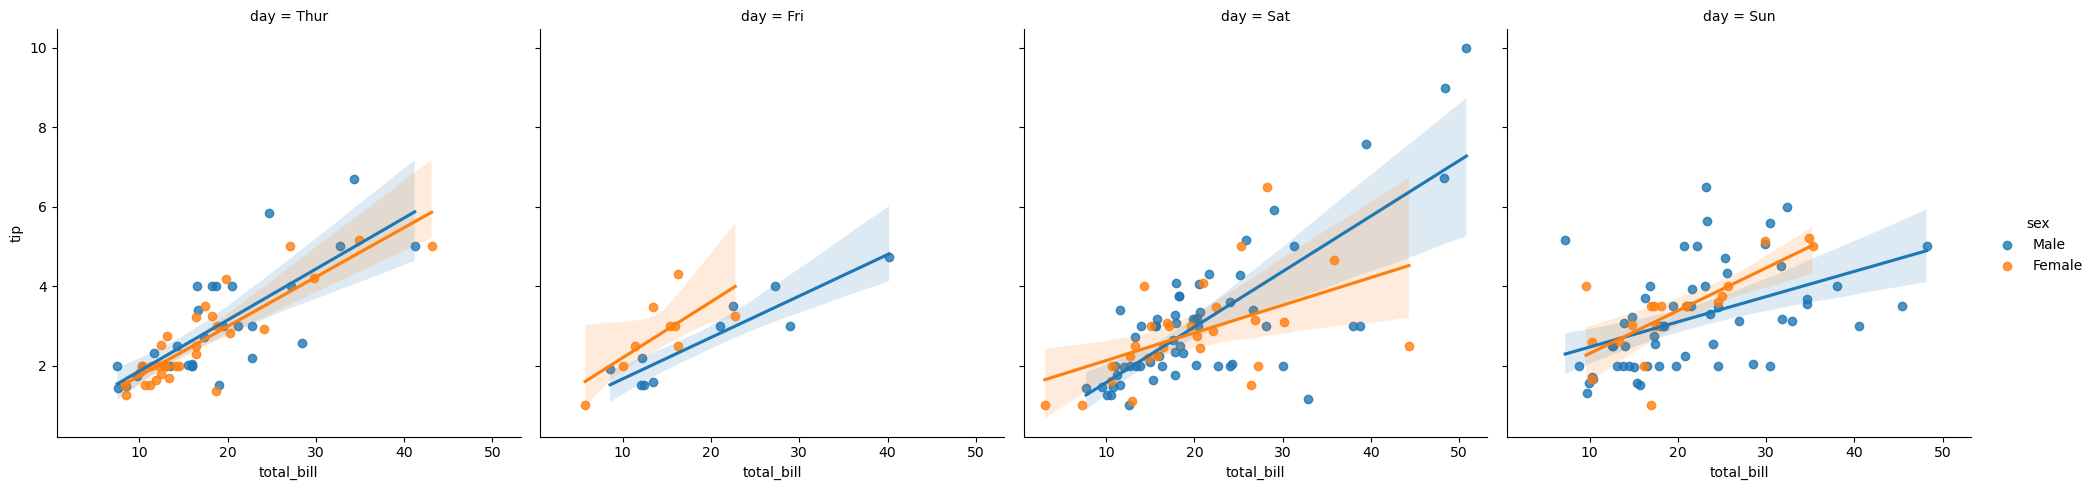

In [25]:
sns.lmplot(data=tips, x='total_bill', y='tip', col="day", hue="sex")
plt.show()

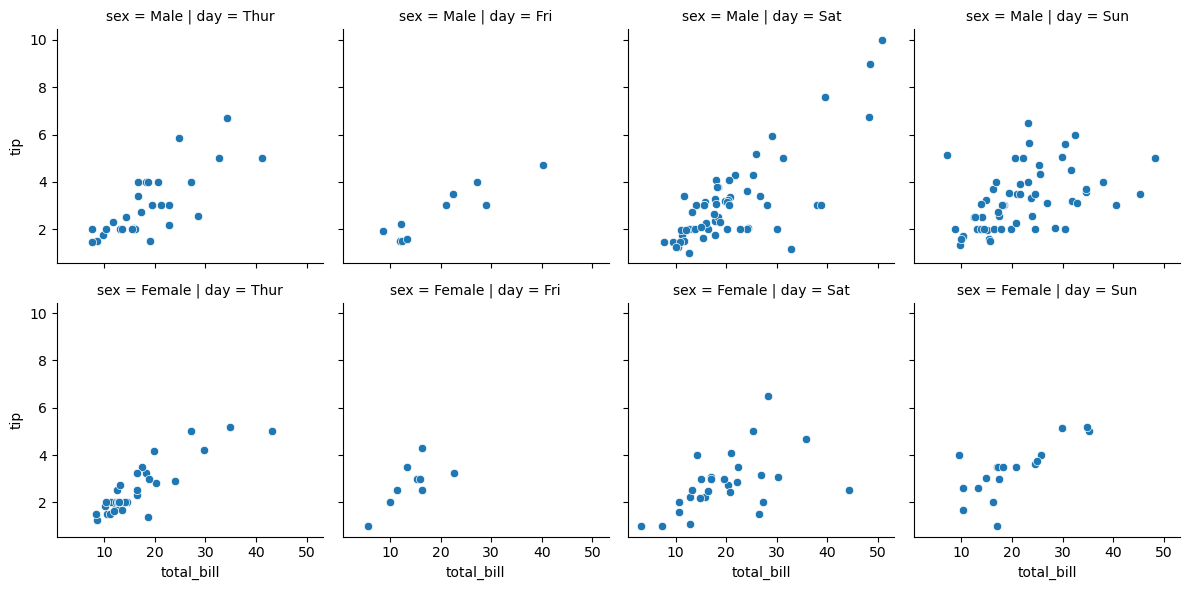

In [26]:
g = sns.FacetGrid(tips, row="sex",  col="day")
g.map(sns.scatterplot, "total_bill", "tip")
plt.show()

## 7장 3절 

In [28]:
import pandas as pd
hsb2 = pd.read_csv('D:/Stat_Book/Data/hsb2.csv') # 실행시 경로 수정
hsb2.head()

,id,female,race,ses,schtyp,prog,read,write,math,science,socst,gender,race_f,ses_f,schtyp_f,prog_f
0,70,0,4,1,1,1,57,52,41,47,57,Male,White,Low,Public,General
1,121,1,4,2,1,3,68,59,53,63,61,Female,White,Middle,Public,Vocational
2,86,0,4,3,1,1,44,33,54,58,31,Male,White,High,Public,General
3,141,0,4,3,1,3,63,44,47,53,56,Male,White,High,Public,Vocational
4,172,0,4,2,1,2,47,52,57,53,61,Male,White,Middle,Public,Academic


In [29]:
scores = hsb2[['read', 'write', 'math', 'science', 'socst']]
scores.describe()

,read,write,math,science,socst
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,52.230000,52.775000,52.645000,51.850000,52.405000
std,10.252937,9.478586,9.368448,9.900891,10.735793
min,28.000000,31.000000,33.000000,26.000000,26.000000
25%,44.000000,45.750000,45.000000,44.000000,46.000000
50%,50.000000,54.000000,52.000000,53.000000,52.000000
75%,60.000000,60.000000,59.000000,58.000000,61.000000
max,76.000000,67.000000,75.000000,74.000000,71.000000


In [30]:
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

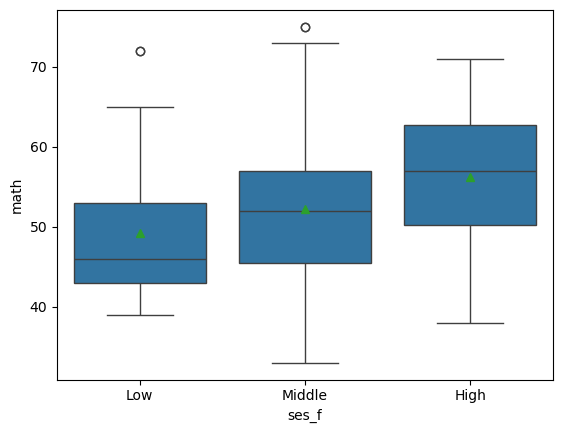

In [31]:
sns.boxplot(data=hsb2, x='ses_f', y='math', showmeans=True)
plt.show()

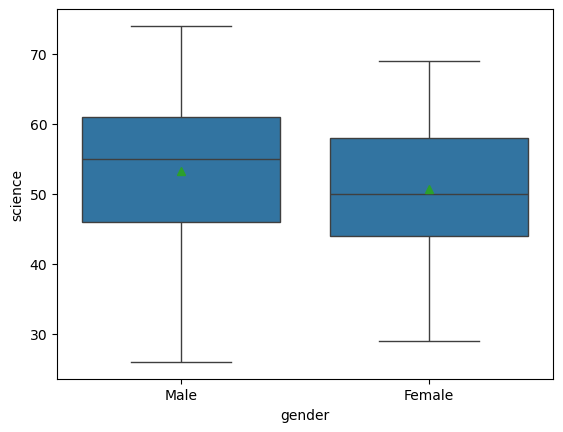

In [32]:
sns.boxplot(data=hsb2, x='gender', y='science', showmeans=True)
plt.show()

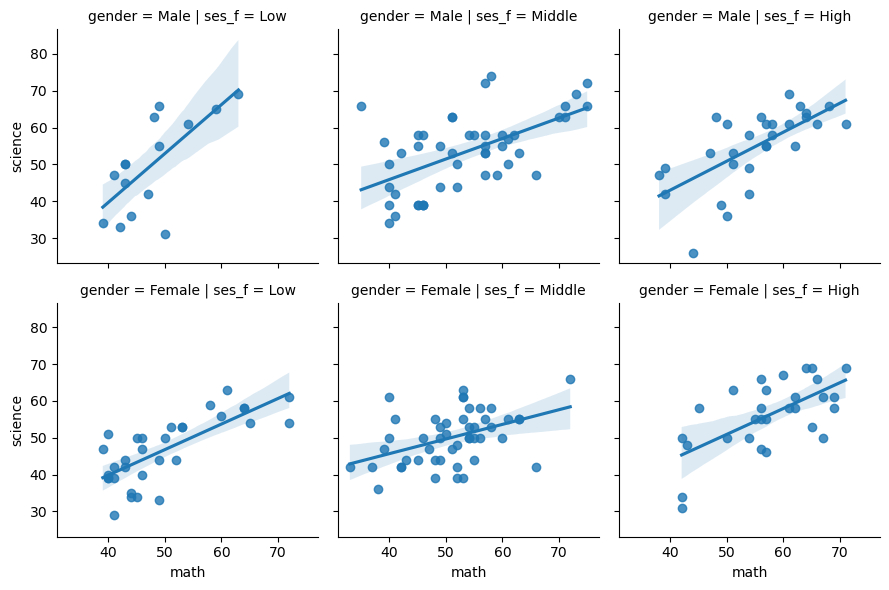

In [33]:
g = sns.FacetGrid(hsb2, col="ses_f", row="gender")
g.map(sns.regplot, "math", "science")
plt.show()

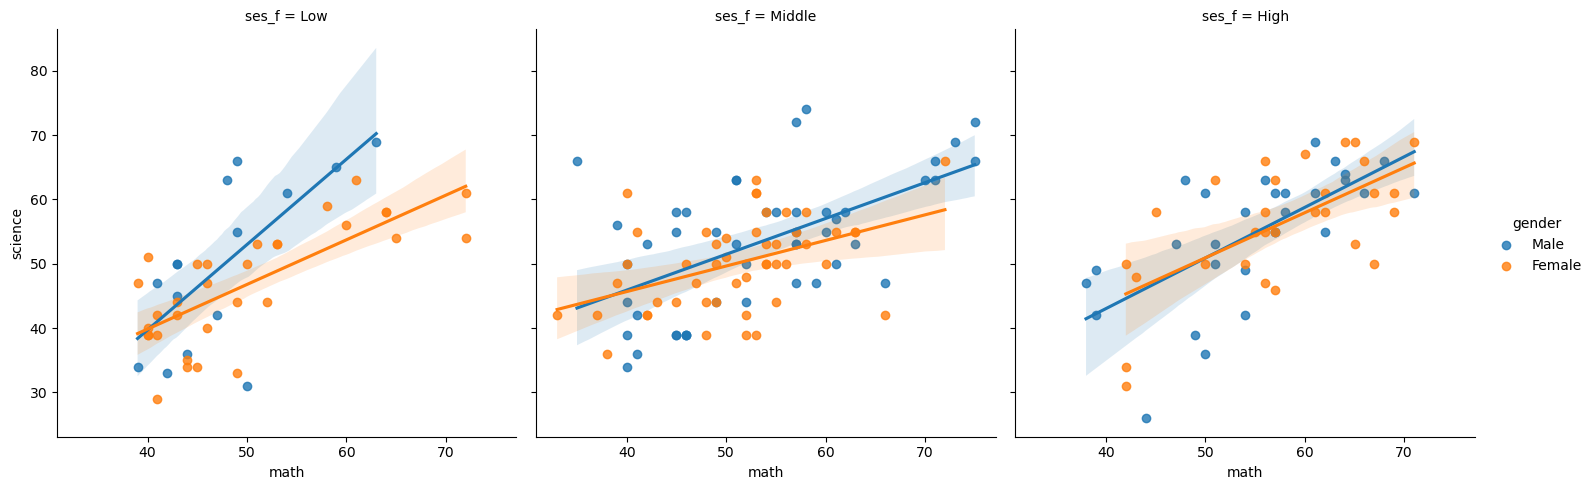

In [34]:
sns.lmplot(data=hsb2, x='math', y='science', col="ses_f", hue="gender")
plt.show()

In [35]:
scores.corr()

,read,write,math,science,socst
read,1.000000,0.596776,0.662280,0.630158,0.621484
write,0.596776,1.000000,0.617449,0.570442,0.604793
math,0.662280,0.617449,1.000000,0.630733,0.544480
science,0.630158,0.570442,0.630733,1.000000,0.465106
socst,0.621484,0.604793,0.544480,0.465106,1.000000


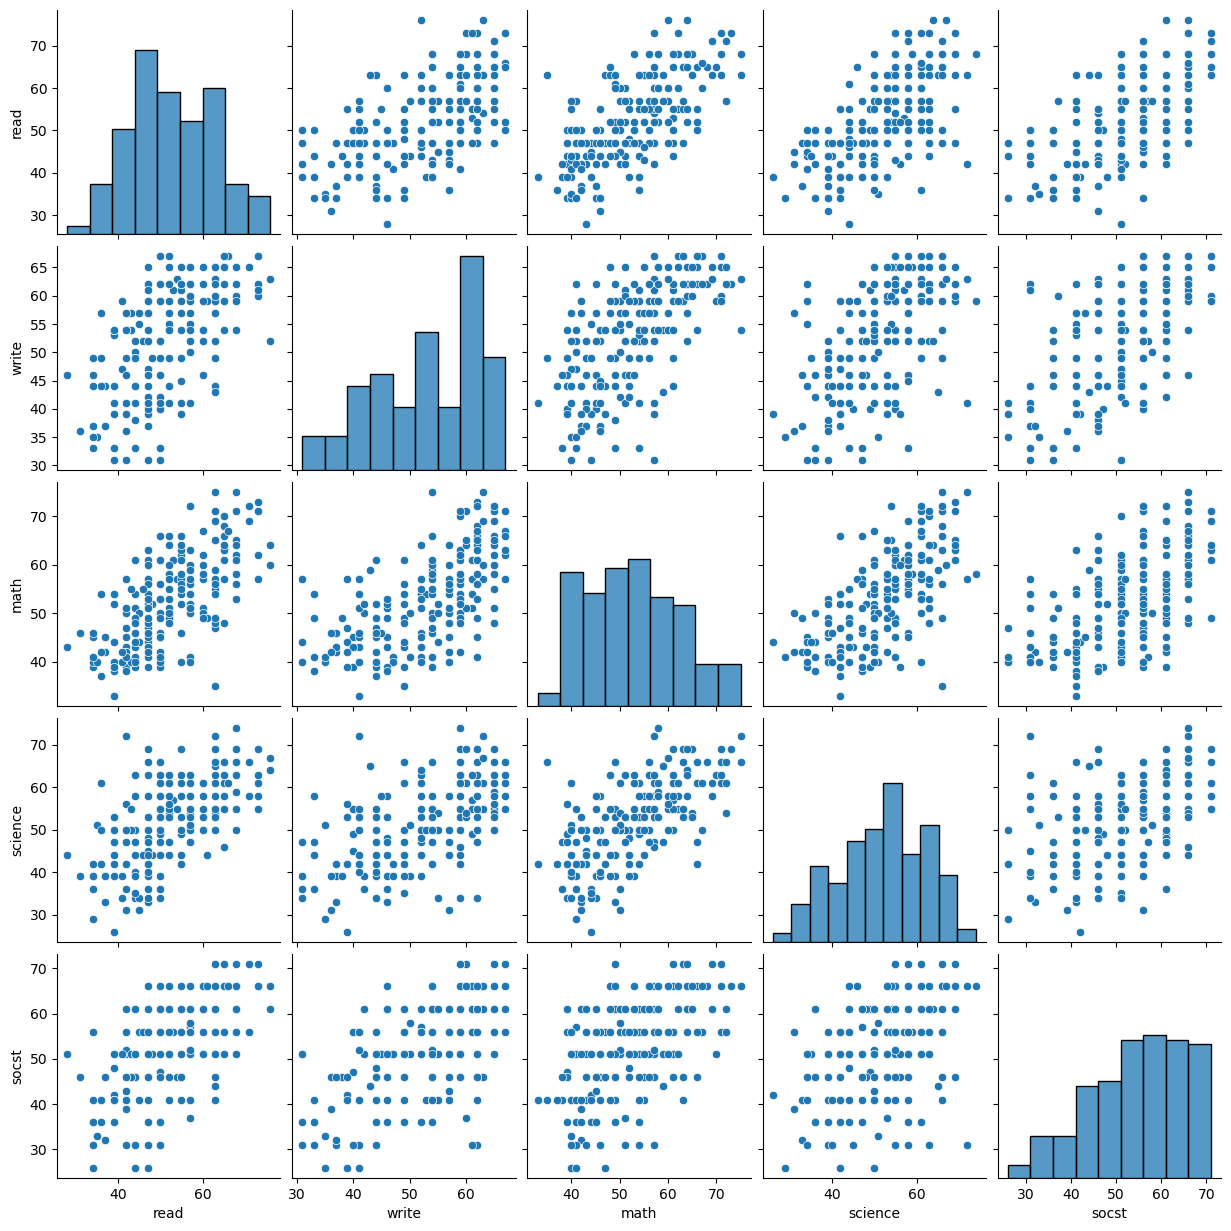

In [36]:
sns.pairplot(scores)
plt.show()